# Ejemplo de una Ecuación Diferencial Ordinaria de Primer Orden Lineal General

Toda ecuación diferencial de primer orden lineal tiene la estructura dada por la siguiente ecuación 

# \begin{equation}
x'(t)+p(t)x(t)=q(t)
\end{equation}

y la solución de está ecuación diferencial es dada por la expresión: $x(t)=\dfrac{c+\int q(t)\mu(t) dt}{\mu(t)}$, donde  $\mu(t)=e^{\int p(t)dt}$  como se demuestra en las notas.

A continuación se ejemplifica la resolución de un ejemplo con el propósito de que se compreneda la forma de construir su solución empleando paqueterías de Python.

# Ejemplo: $\dfrac{dx}{dt}+2tx=1$

La solución general de la ecuación está dada por la expresión: $x(t)=e^{-t^2}\left(c+\dfrac{\sqrt{\pi}}{2} erfi(t)\right) $, donde $erfi(t)=\frac{2}{\sqrt{\pi}}\int^t_0 e^{-(i x)^2}dx$

Para graficar y resolver la ecuación, se van a importar ciertas paqueterías de Python:

In [1]:
#--------------Importando paquetes------------
import numpy as np
from pylab import *
from scipy import special
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#---------------------------------------------

Una vez importados los paquetes se procede a graficar las isóclinas de la ecuación $\dfrac{dx}{dt}=1-2tx$

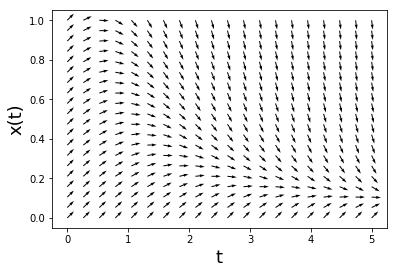

In [2]:
tmax = 5.0
tmin = 0
D = 20
xmax = 1.0
xmin = 0
t = linspace(tmin, tmax, D)
x = linspace(xmin, xmax, D)
T, X = meshgrid(t, x)
deg = arctan(1-2*T*X)
QP = quiver(T,X,cos(deg),sin(deg))
# Gráfica de resultado
plt.xlabel('t', fontsize=18)
plt.ylabel('x(t)', fontsize=18)
show()

Dada una condición inicial $x(t_0)=x_0$ se precederá a resolverse el caso en que $x(0)=\dfrac{1}{2}$, de esto la solución que satisface la condición inicial es $x(t)=e^{-t^2}\left(\dfrac{1}{2}+\dfrac{\sqrt{\pi}}{2} erfi(t)\right) $

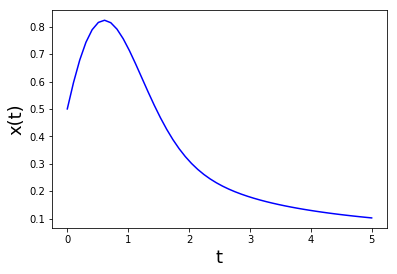

In [3]:
# Definiendo función de solución
def sol(x):
    x = np.exp(-t**2)*((1/2)+(np.sqrt(np.pi)/2)*special.erfi(t))
    return x
# tiempo
t = np.linspace(0,5)

# Gráfica de resultado
plt.plot(t,sol(t), color='blue')
plt.xlabel('t', fontsize=18)
plt.ylabel('x(t)', fontsize=18)
plt.show()

Empleando la paquetería odeint se resolverá en forma numérica dicha ecuación de la siguiente manera:

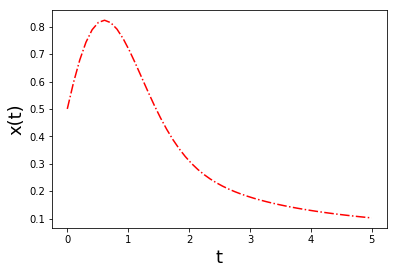

In [4]:
# dy/dx como función de t la variable independiente y x la variable dependiente
def f(x,t):
    dxdt = 1-2*t*x
    return dxdt

# condición inicial
t0 = 0
x0 = 1/2

# tiempo
t = np.linspace(t0,5)

# Soluci de la EDO
x = odeint(f,x0,t)

# Gráfica de resultado
plt.plot(t,x, color='red', linestyle='-.')
plt.xlabel('t', fontsize=18)
plt.ylabel('x(t)', fontsize=18)
plt.show()

Al comparar la solución numérica y la determinada por la solucion general se puede apreciar que ambas son practicamente iguales, como se puede observar en ambas gráficas al ser mostradas en la siguiente figura.

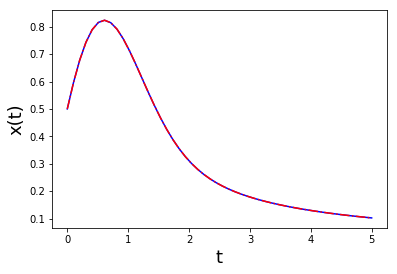

In [6]:
# Gráfica de resultado determinado 
plt.plot(t,sol(t), color='blue')
# Gráfica de resultado numérica
plt.plot(t,x, color='red', linestyle='-.')
plt.xlabel('t', fontsize=18)
plt.ylabel('x(t)', fontsize=18)
plt.show()